# La técnica del "bootstrapping"

Todas las técnicas de estimación que hemos visto hasta el momento parten de una condición ideal: debemos tener acceso a la población.

Pero ya sabemos que en la práctica esto no es viable y sólo tendremos acceso a los datos recolectados (que en últimas son una muestra de la población).

Así que la pregunta es: ¿cómo podemos generar estimaciones confiables si tan sólo tenemos una muestra de la población?

La respuesta está en la técnica de "bootstrapping" que veremos en detalle en esta lección.

Así que comenzaremos haciendo un repaso de la forma como idealmente se hacen estimaciones basadas en la población, luego veremos el principio de funcionamiento del "bootstrapping" así como un sencillo ejemplo que nos permitirá entender la idea básica del método.

Luego haremos una simulación para verificar que las estimaciones obtenidas con el "bootstrapping" son muy cercanas a las obtenidas si tuviésemos la población. Y finalizaremos la lección con un ejemplo práctico aplicado al análisis de un set de datos y con los principales aspectos a tener en cuenta al momento de usar el "bootstrapping".

## 1. El problema de la estimación ideal

![](estimacion-ideal.png)

Como lo hemos venido mencionando, el inconveniente de este método (que llamaremos "estimación ideal") es que debemos tener acceso a todos los datos (es decir a la población).

## 2. *Bootstrapping*: principio de funcionamiento

El principio de funcionamiento del *bootstrapping* es sencillo: en lugar de realizar las estimaciones a partir de la población las haremos a partir de los datos recolectados y siguiendo posteriormente la misma lógica de la "estimación clásica":

![](estimacion-bootstrapping.png)


Así que los pasos a seguir para hacer la estimación serían:

1. Conformar la **muestra de la población** que será simplemente los datos que lograremos recolectar. Esta cantidad de datos recolectada ("n") debe ser representativa de la población.
2. Obtener "M" muestras de la **muestra de la población** usando **muestreo aleatorio con reemplazo**. Cada muestra obtenida tendrá "n" datos (la misma cantidad de datos recolectados).
3. Obtener la **distribución muestral *bootstrapping*** a partir de las muestras obtenidas en (2)
4. **Estimar la estadística y cuantificar la incertidumbre** (error estándar, intervalos de confianza) a partir de la distribución muestral *bootstrapping* obtenida en (3)

Como vemos, la lógica de estimación es muy similar a la del método ideal, pero cambiando la población por los datos recolectados y el muestreo aleatorio por el muestreo aleatorio con reemplazo.

### 2.1. *Bootstrapping*: ejemplo numérico simple

Hagamos un ejemplo muy sencillo para entender los detalles del funcionamiento de esta técnica. Supongamos que los datos recolectados (no la población) serán simplemente estos 5 números:

In [69]:
import numpy as np

datos = np.asarray([23, 16, 14, 57, 64])
datos

array([23, 16, 14, 57, 64])

Y supongamos que queremos estimar la media usando el método *bootstrapping*. Realmente es un problema trivial pues tenemos poquísimos datos, pero la idea es entender los detalles del método.

El paso 1 ya lo hemos llevado a cabo: ya tenemos la **muestra de la población** que son precisamente los 5 datos.

El segundo paso es obtener "M" muestras de este set de datos usando muestreo aleatorio con reemplazo. Además cada muestra debe tener "n" datos (en este caso n=5).

Usualmente se sugiere un "M" entre 1.000 y 10.000, pero como tenemos tan pocos datos (n=5) vamos a suponer un M=10.

Veamos la implementación de este segundo paso:

In [70]:
M = 10
n = len(datos) # n = 5
muestras = np.zeros((M,n)) # Arreglo de 10x5 que contendrá las 10 muestras

for m in range(M):
    # Obtener muestra aleatoria con reemplazo
    muestra = np.random.choice(datos, size=n, replace=True)
    
    # Almacenarla en "muestras" e imprimirla en pantalla
    muestras[m,:] = muestra
    print(muestra)

[57 14 64 16 64]
[23 14 14 57 14]
[16 16 64 64 14]
[57 14 57 64 16]
[16 23 57 23 16]
[64 14 57 16 16]
[23 64 57 16 23]
[14 16 57 23 64]
[16 57 23 14 14]
[16 14 64 57 23]


Vemos que por tratarse de muestreo aleatorio con reemplazo un mismo dato podrá aparecer más de una vez en cada muestra.

Y vemos que cada fila en el arreglo `muestras` contiene cada una de las muestras obtenida anteriormente:

In [71]:
muestras

array([[57., 14., 64., 16., 64.],
       [23., 14., 14., 57., 14.],
       [16., 16., 64., 64., 14.],
       [57., 14., 57., 64., 16.],
       [16., 23., 57., 23., 16.],
       [64., 14., 57., 16., 16.],
       [23., 64., 57., 16., 23.],
       [14., 16., 57., 23., 64.],
       [16., 57., 23., 14., 14.],
       [16., 14., 64., 57., 23.]])

El paso 3 consiste en obtener la **distribución muestral *bootstrapping***. Como la estadística que queremos estimar es la media, esta distribución muestral será simplemente la media de cada muestra, es decir de cada fila en el arreglo `muestras`.

Esta media por filas la podemos obtener con el método `mean(axis=1)` donde `axis=1` le indica a NumPy que queremos calcular el promedio de cada fila:

In [72]:
d_muestral_boot = muestras.mean(axis=1)
d_muestral_boot

array([43. , 24.4, 34.8, 41.6, 27. , 33.4, 36.6, 34.8, 24.8, 34.8])

<Axes: ylabel='Count'>

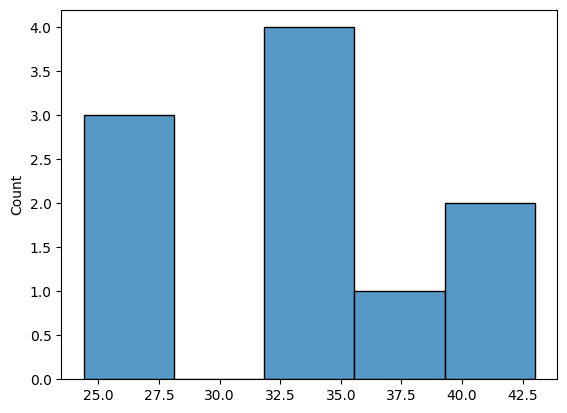

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(d_muestral_boot)

Y con esto ya tenemos la distribución muestral *bootstrapping*.

El cuarto y último paso consiste en tomar esta distribución muestral y calcular tanto la estimación como la incertidumbre en la misma.

Comencemos con la estimación, que será la media:

In [74]:
# Estimar la media a partir de la distribución muestral "bootstrapping"
media_boot = np.mean(d_muestral_boot)
print(f"Media de la distribución muestral bootstrapping: {media_boot.mean()}")

Media de la distribución muestral bootstrapping: 33.52


Y ahora calculemos la incertidumbre en esta estimación. Usaremos las dos métricas aprendidas anteriormente: el error estándar y el intervalo de confianza.

Comencemos con el error estándar, que será simplemente la desviación estándar de la distribución muestral *bootstrapping*:

In [75]:
error_boot = np.std(d_muestral_boot)
print(f"Error estándar estimación bootstrapping: {error_boot}")

Error estándar estimación bootstrapping: 6.09340627235703


In [76]:
from scipy import stats

datos = d_muestral_boot
media = np.mean(datos)
sem = stats.sem(datos)  # error estándar de la media
ic = stats.t.interval(0.95, len(datos)-1, loc=media, scale=sem)  # IC del 95%
print(ic)
print(media)
print(sem)

(np.float64(28.925252451602486), np.float64(38.11474754839752))
33.52
2.03113542411901


Y ahora calculemos el intervalo de confianza de, por ejemplo, el 95%. Para ello reutilizaremos la función creada en la lección anterior (con ligeras modificaciones):

In [77]:
def calcular_IC(distribucion, ic):
    # Calcular umbrales percentiles del lado izquierdo y derecho
    lim_izq = (1-ic)/2 * 100
    lim_der = (ic + (1-ic)/2) * 100
    
    # Calcular valores percentiles izquierdo y derecho
    perc_izq = np.percentile(distribucion, lim_izq)
    perc_der = np.percentile(distribucion, lim_der)
    
    # Retornar intervalo   
    return [perc_izq, perc_der]

Y ahora sí calculemos el intervalo de confianza del 95%:

In [78]:
ic_boot = calcular_IC(d_muestral_boot, ic=0.95)
print(f"Intervalo de confianza del 95% (bootstrapping): {ic_boot[0]:.1f} a {ic_boot[1]:.1f}")

Intervalo de confianza del 95% (bootstrapping): 24.5 a 42.7


Y listo, ya hemos visto paso a paso cómo generar estimaciones usando el método *bootstrapping*.

Esta misma lógica la podremos aplicar a casos en los cuales tengamos muchísimos más datos, así que vale la pena reorganizar el código anterior para poderlo utilizar.

Para ello vamos a crear la función `estimacion_boot` que permite realizar estimaciones y cálculos de incertidumbre **sobre la media** a partir de un arreglo numérico de datos.

Los parámetros de entrada de esta función serán:

- `arreglo`: los datos recolectados que usaremos para hacer la estimación
- `M`: el número de muestras *bootstrapping* a obtener (por defecto 1.000)
- `ic`: el intervalo de confianza deseado (por defecto 0.95)

A la salida la función retornará:

- `media_boot`: la media estimada usando la técnica del *bootstrapping*
- `error_boot` e `ic_boot`: el error estándar y el intervalo de confianza calculados usando la técnica del *bootstrapping*

Veamos esta implementación:

In [79]:
def estimacion_boot(arreglo, M=1000, ic=0.95):
    # Inicialización
    n = len(arreglo)   # Tamaño del set de datos
    muestras = np.zeros((M,n)) # Arreglo de Mxn con las muestras
    
    # Muestreo aleatorio con reemplazo
    for m in range(M):
        muestras[m,:] = np.random.choice(arreglo, size=n, replace=True)
        
    # Calcular distribución muestral "bootstrapping" (medias)
    d_muestral_boot = muestras.mean(axis=1)
    
    # Estimar estadística
    media_boot = d_muestral_boot.mean()
    
    # Estimar error estándar
    error_boot = d_muestral_boot.std()
    
    # Estimar intervalo de confianza
    lim_izq = (1-ic)/2 * 100
    lim_der = (ic + (1-ic)/2) * 100
    
    perc_izq = np.percentile(d_muestral_boot, lim_izq)
    perc_der = np.percentile(d_muestral_boot, lim_der)
    
    # Retornar estadística estimada, error estándar e intervalo de confianza
    return media_boot, error_boot, [perc_izq, perc_der]    

Y verifiquemos que todo funciona correctamente haciendo nuevamente la estimación sobre el set que usamos anteriormente:

In [80]:
media, error, ic = estimacion_boot(datos, M=1000, ic=0.95)

# Imprimir información
print(f'Media estimada (bootstrapping): {media:.1f}')
print(f'Error estándar (bootstrapping): {error:.1f}')
print(f'Intervalo de confianza (bootstrapping): {ic[0]:.1f} a {ic[1]:.1f}')

Media estimada (bootstrapping): 33.5
Error estándar (bootstrapping): 2.0
Intervalo de confianza (bootstrapping): 29.5 a 37.3


Y listo, en este punto tenemos todo lo básico acerca del *bootstrapping*

## 3. ¿Qué tan buenas son las estimaciones obtenidas con el *bootstrapping*?

En este punto la idea es determinar qué tan buenas estimaciones nos arroja esta técnica.

Para ello haremos la siguiente simulación:

- Generaremos una población de 10.000 datos (números aleatorios con distribución Gaussiana)
- De la población anterior tomaremos una muestra de 2.000 datos. Este será el set de datos que usaremos para obtener las estimaciones con el *bootstrapping*
- Calcularemos la media y la desviación estándar de la población. Estos serán nuestros valores de referencia
- Y luego estimaremos la media a partir del set de datos y calcularemos la incertidumbre en la estimación usando en ambos casos *bootstrapping*
- Al final compararemos los resultados obtenidos

Comencemos generando la población:

In [88]:
pob = np.random.normal(loc=5.0, scale=1.0, size=10000)
print('Población: ')
print(f'\tMedia:      {pob.mean():.2f}')
print(f'\tDesviación: {pob.std():.2f}')
pob

Población: 
	Media:      5.01
	Desviación: 1.00


array([6.25372791, 3.56154476, 3.63444631, ..., 3.86128986, 5.53822319,
       4.35126873], shape=(10000,))

Ahora vamos a crear nuestro set de datos. En esta simulación tomaremos una muestra aleatoria de 2.000 de la población:

In [82]:
datos = np.random.choice(pob, size=2000, replace=False)
datos.shape

(2000,)

Y con este set de datos haremos las estimaciones y calcularemos la incertidumbre usando la técnica del *bootstrapping* y la función creada anteriormente:

In [83]:
media, error, ic = estimacion_boot(datos, M=10000, ic=0.95)

# Imprimir información
print(f'Media estimada (bootstrapping): {media:.2f}')
print(f'Error estándar (bootstrapping): {error:.2f}')
print(f'Intervalo de confianza (bootstrapping): {ic[0]:.2f} a {ic[1]:.2f}')

Media estimada (bootstrapping): 4.98
Error estándar (bootstrapping): 0.02
Intervalo de confianza (bootstrapping): 4.94 a 5.03


¡Y vemos que en efecto la estimación de la media obtenida con el *bootstrapping* es bastante buena!

De hecho, si tomamos la media real de la población y la dividimos entre $\sqrt(n)$ (con n=2000) tendremos prácticamente el mismo error estándar:

In [84]:
pob.std()/np.sqrt(2000)

np.float64(0.02238159894599468)

Y podemos jugar un poco con la cantidad de muestras usadas al hacer la estimación con el *bootstrapping*:

In [91]:
media, error, ic = estimacion_boot(datos, M=1000, ic=0.99)

# Imprimir información
print(f'Media estimada (bootstrapping): {media:.2f}')
print(f'Error estándar (bootstrapping): {error:.2f}')
print(f'Intervalo de confianza (bootstrapping): {ic[0]:.2f} a {ic[1]:.2f}')

Media estimada (bootstrapping): 5.31
Error estándar (bootstrapping): 0.54
Intervalo de confianza (bootstrapping): 3.59 a 6.37


Y vemos que en este caso particular, incluso con 10 muestras *bootstrapping* la estimación sigue siendo buena. Sin embargo, no podemos generalizar y lo que se recomienda es usar entre 1.000 y 10.000 remuestreos (todo dependerá de qué tan grande o pequeño sea nuestro set de datos).

Otro aspecto a tener en cuenta es que los datos que recolectemos **deben ser una muestra representativa de la población**. Es decir que si tenemos "pocos" datos la estimación con *bootstrapping* ya no será tan buena.

Hagamos este experimento, en lugar de 2.000 generemos sets de datos con n=1.000, n=100 y n=10 muestras e imprimamos en cada caso las estimaciones de la media obtenidas con *bootstrapping*:

In [86]:
N = [1000, 100, 10]

# Imprimir valor de referencia (media de la población)
print('Población: ')
print(f'\tMedia: {pob.mean():.2f}')

# Generar sets de datos con los diferentes valores de "n"
# y realizar estimaciones con "bootstrapping"
for n in N:
    print(f'Bootstrapping: dataset con {n} datos:')
    
    # Crear set de datos simulado
    datos = np.random.choice(pob, size=n, replace=False)
    
    # Estimar media con "bootstrapping e imprimir resultado"
    media, error, ic = estimacion_boot(datos, M=1000, ic=0.95)
    print(f'\tMedia: {media:.2f}')
    

Población: 
	Media: 5.00
Bootstrapping: dataset con 1000 datos:
	Media: 4.99
Bootstrapping: dataset con 100 datos:
	Media: 5.15
Bootstrapping: dataset con 10 datos:
	Media: 5.28


Y vemos que en general a medida que se reduce la cantidad de datos usados la estimación es cada vez menos precisa.

## 4. *Bootstrapping*: ejemplo práctico con un set de datos

Lo único que nos resta es poner en práctica la técnica del *bootstrapping* para analizar un set de datos real.

Para esto usaremos el set *dataset-prestamos.csv* que contiene información sobre diferentes tipos de préstamos otorgados a diferentes clientes de una entidad bancaria:

In [87]:
import pandas as pd

ruta = '/Users/miguel/Library/CloudStorage/GoogleDrive-miguel@codificandobits.com/My Drive/02-CODIFICANDOBITS.COM/04-Academia/01-Cursos/22-2024-04-Estadística-Inferencial-Fundamentos/datos/'
df = pd.read_csv(ruta + 'dataset-prestamos.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/miguel/Library/CloudStorage/GoogleDrive-miguel@codificandobits.com/My Drive/02-CODIFICANDOBITS.COM/04-Academia/01-Cursos/22-2024-04-Estadística-Inferencial-Fundamentos/datos/dataset-prestamos.csv'

Y planteemos una pregunta sencilla:

¿Cuál es el monto estimado de los créditos para los diferentes estados (Al día, impago y pagado)?

Para responder a esta pregunta comencemos generando una gráfica tipo *boxplot* con el fin de tener un panorama inicial del comportamiento de los datos:

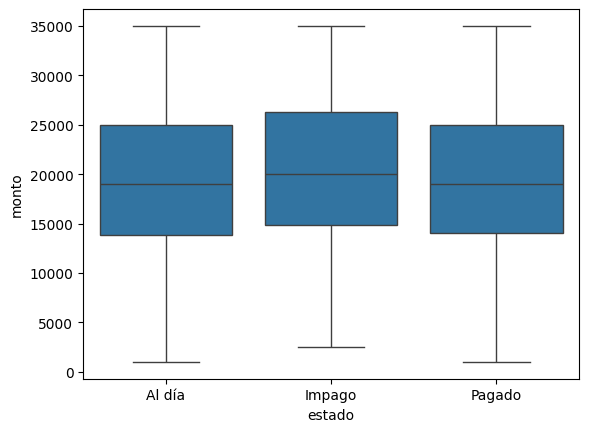

In [ ]:
import seaborn as sns

sns.boxplot(data=df, x='estado', y='monto');

Vemos que no aparecen valores extremos en ninguna de las distribuciones, así que podremos usar la media como estadística para caracterizar cada grupo.

Así que lo que queremos es:

> Usar la técnica de *bootstrapping* para estimar la media del monto de los créditos "Al día", "Impago" y "Pagado" para créditos a 36 meses

Y para esto podemos usar la misma función creada anteriormente (`estimacion_boot`). En caso de que hubiese valores extremos deberíamos usar una métrica más robusta (como por ejemplo la mediana) y sería necesario modificar la función `estimacion_boot`.

Antes de realizar las estimaciones debemos extraer las agrupaciones de interés según el estado (Al día, Impago y Pagado):

In [ ]:
df_ald = df[df['estado'] == 'Al día']
df_imp = df[df['estado'] == 'Impago']
df_pag = df[df['estado'] == 'Pagado']

print(df_ald.head())
print(df_imp.head())
print(df_pag.head())

   estado  monto
0  Al día   2500
1  Al día   5600
2  Al día   5375
3  Al día   5000
4  Al día  21000
      estado  monto
334   Impago  35000
478   Impago   2500
849   Impago  23275
1219  Impago  25000
1220  Impago  17000
      estado  monto
7370  Pagado  12000
7371  Pagado  19800
7372  Pagado  19700
7373  Pagado  24000
7374  Pagado  13375


Y ahora sí realicemos las estimaciones usando *bootstrapping*:

In [ ]:
media_ald, error_ald, ic_ald = estimacion_boot(df_ald['monto'].to_numpy(), M=10000, ic=0.95)
media_imp, error_imp, ic_imp = estimacion_boot(df_imp['monto'].to_numpy(), M=10000, ic=0.95)
media_pag, error_pag, ic_pag = estimacion_boot(df_pag['monto'].to_numpy(), M=10000, ic=0.95)

Y pongamos estos resultados en un DataFrame de Pandas para poder interpretarlos fácilmente

In [ ]:
ests = pd.DataFrame({
    "Crédito": ['Al día', 'Impago', 'Pagado'],
    "Media (estimada)": np.round([media_ald , media_imp, media_pag],1),
    "Error estándar": np.round([error_ald, error_imp, error_pag],1),
    "IC (95%)": [np.round(ic_ald,1), np.round(ic_imp,1), np.round(ic_pag,1)]
})
ests

,Crédito,Media (estimada),Error estándar,IC (95%)
0,Al día,19251.3,93.3,"[19066.1, 19434.7]"
1,Impago,20846.1,952.8,"[18938.1, 22690.5]"
2,Pagado,19447.8,126.6,"[19205.1, 19694.0]"


In [ ]:
print(df_ald.shape)
print(df_imp.shape)
print(df_pag.shape)

(7294, 2)
(76, 2)
(3907, 2)


**Observaciones:**
- En orden descendente los créditos en "Impago" tienen el promedio más alto, seguidos por los créditos pagados y los créditos al día.
- Sin embargo la estimación de los créditos en "Impago" tiene un alto grado de incertidumbre

## 4. Aspectos a tener en cuenta

1. La técnica del *bootstrapping* es la que debemos usar al momento de realizar estimaciones sobre los datos recolectados
2. Para implementar esta técnica debemos:
   - Recolectar los datos
   - Generar "M" muestras con reemplazo cada una del mismo tamaño del set de datos (y con M entre 1.000 y 10.000)
   - Construir la distribución muestral a partir de esas "M" muestras
   - Generar las estimaciones y calcular la incertidumbre a partir de la distribución muestral obtenida
3. La técnica se puede aplicar para estimar cualquier estadística (no sólo la media)
4. Y más adelante veremos que es la técnica a elegir cuando queramos realizar pruebas de hipótesis sobre nuestros datos